In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

%matplotlib inline

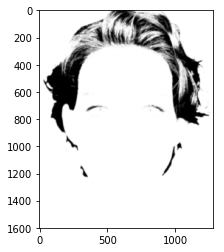

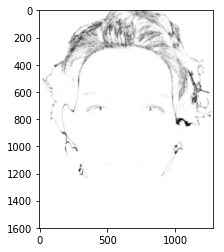

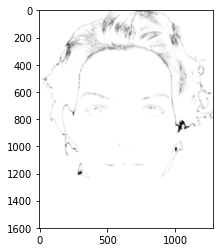

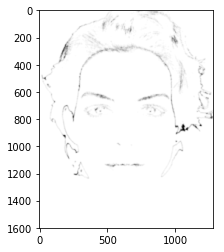

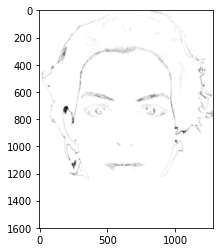

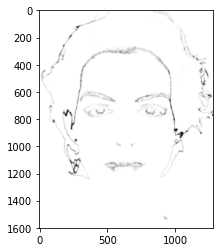

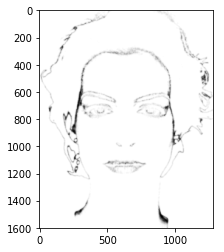

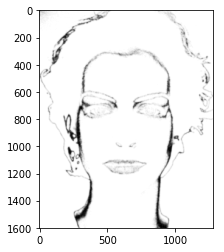

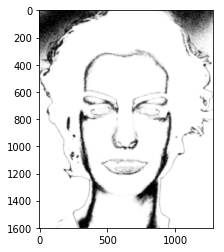

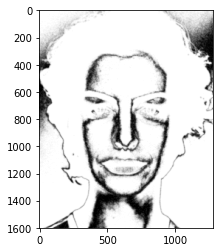

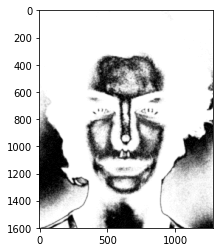

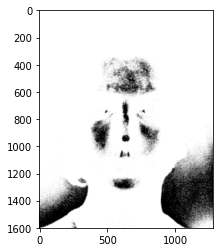

In [43]:
anne = np.asarray(Image.open('./images/AH.jpg', 'r').convert('L'))

bins = 12

anne = (anne / (255 / bins)).astype(int)

imgfilter = ImageFilter.GaussianBlur(3)

layers = []

for v in range(0, bins):
    layer = anne.copy()
    layer[layer != v] = -1
    layer[layer == v] = v * (255 / bins)
    layer[layer == -1] = 255
    preimage = Image.fromarray(np.uint8(layer))
    
    for _ in range(2):
        preimage = preimage.filter(imgfilter)
    
    for _ in range(0):
        preimage = preimage.filter(ImageFilter.EDGE_ENHANCE_MORE)
    
    postimage = np.asarray(preimage)
    layers.append(postimage)
    plt.figure()
    plt.imshow(postimage, cmap='Greys_r')


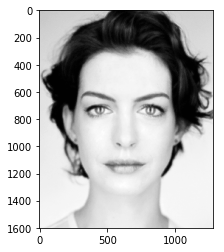

In [42]:

plt.figure()
sumarray = np.asarray(layers).sum(axis=0) 
plt.imshow(sumarray, cmap='Greys_r')
